<a href="https://colab.research.google.com/github/lagom-QB/M11/blob/master/Copy_of_Practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keywords: modules, optimizers, dense layer


# High level concepts

## Modules

Modules helps organizing and composing functions and inputs (weights) together.

In [0]:
from torch import nn
from torch.nn import init
from torch.nn.modules import loss
import torch

Some examples:

In [31]:
linear = nn.Linear(10, 10)
linear

Linear(in_features=10, out_features=10, bias=True)

In [32]:
linear(torch.tensor([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,0.0]))

tensor([-2.2866, -6.1020,  3.7358,  1.5607, -1.5761, -1.2221, -5.1340,  1.0736,
        -0.8882,  3.5746], grad_fn=<AddBackward0>)

In [33]:
relu = nn.ReLU()
relu


ReLU()

In [34]:
x = torch.tensor([-1.0])
relu(x)

tensor([0.])

In [35]:
tanh = nn.Tanh()
tanh

Tanh()

In [36]:
dropout = nn.Dropout(0.45, inplace=True)
dropout

Dropout(p=0.45, inplace=True)

In [37]:
sequential = nn.Sequential(nn.Linear(10, 100), nn.Tanh(), nn.Linear(100,100), nn.Dropout(0.4, inplace = True), nn.Linear(100,10))
sequential

Sequential(
  (0): Linear(in_features=10, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Dropout(p=0.4, inplace=True)
  (4): Linear(in_features=100, out_features=10, bias=True)
)

In [38]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(10,100)
        self.act1 = nn.Tanh()
        self.lin2 = nn.Linear(100,100)
        self.lin3 = nn.Linear(100,100)
        self.lin4 = nn.Linear(100,10)
        
    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        x = self.act1(x)
        x = self.lin3(x)
        x = self.act1(x)
        x = self.lin4(x)
        return x
net = Net()
net


Net(
  (lin1): Linear(in_features=10, out_features=100, bias=True)
  (act1): Tanh()
  (lin2): Linear(in_features=100, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=100, bias=True)
  (lin4): Linear(in_features=100, out_features=10, bias=True)
)

In [39]:
cross_entropy = loss.CrossEntropyLoss()
cross_entropy


CrossEntropyLoss()

In [0]:
from torch.nn import Module

In [0]:
from torch.nn import Parameter

In [0]:
class Power(Module):

    __constants__ = ['exponent']

    def __init__(self, exponent=3):
        super().__init__()
        self.exponent = exponent

    def forward(self, input):
        return torch.pow(input, self.exponent)

    def extra_repr(self):
        return f'exponent={self.exponent}'

In [43]:
Power(exponent = 4)



Power(exponent=4)

In [0]:
class WPower(Module):    
    def __init__(self, ):
        super().__init__()
        self.exponent = Parameter(torch.Tensor(1))
        self.reset_parameters()

    def reset_parameters(self):
        init.uniform_(self.exponent, a=math.sqrt(5))

    def forward(self, input):
        return torch.pow(input, self.exponent)


## Parameters

Some models are not just functions, but they also have internal parameters (weights/graph inputs).

In [45]:
list(linear.parameters())


[Parameter containing:
 tensor([[-0.1841, -0.2706, -0.0248, -0.0374, -0.2025, -0.2800,  0.1331, -0.1579,
           0.2137, -0.0756],
         [ 0.3044, -0.1330, -0.3043, -0.2973, -0.0440, -0.3158,  0.2321, -0.1708,
          -0.2097, -0.0177],
         [ 0.0073, -0.1068, -0.0715,  0.2875, -0.2889,  0.2396, -0.2814,  0.3076,
           0.2679,  0.1112],
         [ 0.1610,  0.2035, -0.0718,  0.2903,  0.2890,  0.2556,  0.2927, -0.3029,
          -0.2906, -0.0708],
         [ 0.2511,  0.1973, -0.1474,  0.1887, -0.1552, -0.3096,  0.2602, -0.1486,
          -0.0490, -0.2428],
         [ 0.2463, -0.0933,  0.2715,  0.0695, -0.1928, -0.0424, -0.0567,  0.1480,
          -0.2343,  0.0064],
         [-0.2895, -0.1613,  0.2282, -0.2646, -0.1181,  0.0240, -0.0506, -0.1239,
          -0.2742, -0.3085],
         [-0.2798, -0.2613, -0.1899, -0.1370, -0.0795,  0.2287,  0.2967,  0.0120,
          -0.0344,  0.0325],
         [-0.2263, -0.0347, -0.2762,  0.1199, -0.0095, -0.0934, -0.0084, -0.0961,
       

In [46]:
linear.weight


Parameter containing:
tensor([[-0.1841, -0.2706, -0.0248, -0.0374, -0.2025, -0.2800,  0.1331, -0.1579,
          0.2137, -0.0756],
        [ 0.3044, -0.1330, -0.3043, -0.2973, -0.0440, -0.3158,  0.2321, -0.1708,
         -0.2097, -0.0177],
        [ 0.0073, -0.1068, -0.0715,  0.2875, -0.2889,  0.2396, -0.2814,  0.3076,
          0.2679,  0.1112],
        [ 0.1610,  0.2035, -0.0718,  0.2903,  0.2890,  0.2556,  0.2927, -0.3029,
         -0.2906, -0.0708],
        [ 0.2511,  0.1973, -0.1474,  0.1887, -0.1552, -0.3096,  0.2602, -0.1486,
         -0.0490, -0.2428],
        [ 0.2463, -0.0933,  0.2715,  0.0695, -0.1928, -0.0424, -0.0567,  0.1480,
         -0.2343,  0.0064],
        [-0.2895, -0.1613,  0.2282, -0.2646, -0.1181,  0.0240, -0.0506, -0.1239,
         -0.2742, -0.3085],
        [-0.2798, -0.2613, -0.1899, -0.1370, -0.0795,  0.2287,  0.2967,  0.0120,
         -0.0344,  0.0325],
        [-0.2263, -0.0347, -0.2762,  0.1199, -0.0095, -0.0934, -0.0084, -0.0961,
          0.0980, -0.2143

In [47]:
linear.bias


Parameter containing:
tensor([-0.2370, -0.2952,  0.1115,  0.0576, -0.0920,  0.1653,  0.1114,  0.1556,
         0.3099, -0.2964], requires_grad=True)

In [48]:
list(tanh.parameters())


[]

In [49]:
list(dropout.parameters())


[]

In [50]:
dropout.p 

0.45

In [51]:
list(cross_entropy.parameters())


[]

In [52]:
list(map(lambda x: x.shape, list(sequential.parameters())))


[torch.Size([100, 10]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([10, 100]),
 torch.Size([10])]

In [53]:
list(map(lambda x: x.shape, list(net.parameters())))


[torch.Size([100, 10]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([10, 100]),
 torch.Size([10])]

In [54]:
list(map(lambda x: x.requires_grad, list(net.parameters())))


[True, True, True, True, True, True, True, True]

## Eval

Each module can be in either `eval` or `train` state.

In [55]:
dropout.train()


Dropout(p=0.45, inplace=True)

In [56]:
dropout(torch.ones(10))


tensor([0.0000, 0.0000, 1.8182, 1.8182, 0.0000, 0.0000, 1.8182, 0.0000, 0.0000,
        1.8182])

In [57]:
dropout.eval()


Dropout(p=0.45, inplace=True)

In [58]:
newseq = nn.Sequential(nn.Dropout(), nn.Dropout())
newseq(torch.ones(10))


tensor([0., 0., 4., 0., 0., 4., 0., 0., 4., 4.])

In [59]:
newseq.eval()
newseq(torch.ones(10))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Important**! Train / eval mode has nothing to do with weight training. It just changes behaviour of some modules (i.e. `dropout`, `batchnorm`). For composite modules `.eval()`/`.train()` sets corresponding mode for each of its components.

## Initialization

Most of module have default way of parameter initialization, but sometimes we might want to init them explicitly.

In [60]:
linear.weight

Parameter containing:
tensor([[-0.1841, -0.2706, -0.0248, -0.0374, -0.2025, -0.2800,  0.1331, -0.1579,
          0.2137, -0.0756],
        [ 0.3044, -0.1330, -0.3043, -0.2973, -0.0440, -0.3158,  0.2321, -0.1708,
         -0.2097, -0.0177],
        [ 0.0073, -0.1068, -0.0715,  0.2875, -0.2889,  0.2396, -0.2814,  0.3076,
          0.2679,  0.1112],
        [ 0.1610,  0.2035, -0.0718,  0.2903,  0.2890,  0.2556,  0.2927, -0.3029,
         -0.2906, -0.0708],
        [ 0.2511,  0.1973, -0.1474,  0.1887, -0.1552, -0.3096,  0.2602, -0.1486,
         -0.0490, -0.2428],
        [ 0.2463, -0.0933,  0.2715,  0.0695, -0.1928, -0.0424, -0.0567,  0.1480,
         -0.2343,  0.0064],
        [-0.2895, -0.1613,  0.2282, -0.2646, -0.1181,  0.0240, -0.0506, -0.1239,
         -0.2742, -0.3085],
        [-0.2798, -0.2613, -0.1899, -0.1370, -0.0795,  0.2287,  0.2967,  0.0120,
         -0.0344,  0.0325],
        [-0.2263, -0.0347, -0.2762,  0.1199, -0.0095, -0.0934, -0.0084, -0.0961,
          0.0980, -0.2143

In [61]:
init.xavier_uniform_(linear.weight)


Parameter containing:
tensor([[ 0.3964, -0.3738, -0.1707,  0.2043, -0.5209, -0.3062,  0.2264,  0.0719,
         -0.3809, -0.2267],
        [ 0.4128, -0.5404, -0.4449,  0.3523, -0.3056,  0.5182,  0.3036, -0.4446,
          0.3724,  0.1884],
        [ 0.5032, -0.1352,  0.5015, -0.1440,  0.2471,  0.2670, -0.0344,  0.5327,
         -0.0842, -0.0143],
        [-0.0517, -0.3589,  0.4782,  0.1596,  0.1457, -0.2698,  0.4296,  0.0849,
         -0.4978,  0.0292],
        [-0.2763,  0.0665, -0.4960,  0.3620, -0.2832,  0.0552, -0.0335,  0.4341,
          0.2753, -0.2730],
        [-0.0840,  0.5242,  0.1976,  0.1535, -0.4351,  0.3219,  0.2517, -0.0349,
         -0.4192, -0.1800],
        [ 0.0278,  0.4917, -0.4840,  0.1552, -0.1271, -0.1368, -0.2442, -0.4015,
         -0.4935,  0.3335],
        [ 0.4641, -0.0811, -0.3439, -0.4597, -0.4653,  0.4271, -0.1744,  0.2252,
          0.4277, -0.0655],
        [-0.2928, -0.5395,  0.0479, -0.0527, -0.0259,  0.1733,  0.0995, -0.1139,
         -0.4507, -0.0180

In [62]:
init.constant_(linear.weight, 1.0)


Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [63]:
list(linear.parameters())


[Parameter containing:
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True),
 Parameter containing:
 tensor([-0.2370, -0.2952,  0.1115,  0.0576, -0.0920,  0.1653,  0.1114,  0.1556,
          0.3099, -0.2964], requires_grad=True)]

In [64]:
for param in linear.parameters():
    init.uniform_(param, -12, 12)
list(linear.parameters())

[Parameter containing:
 tensor([[ -0.8955,  -7.3200,  11.8042,   2.3805,  -1.9371,   6.2361,  -6.1504,
            5.4821,  -0.7473, -11.7750],
         [ -9.6005,   7.2515,  -8.3429,   9.0277,  -2.2263,  -8.1955,   2.4189,
           -6.3216,   1.6924,   3.3800],
         [ 11.7391,  -1.9932,   2.2595,  -5.4431,  11.7544,  -8.7856,   3.1187,
           -9.1097,   2.9110,   4.6401],
         [  9.0106, -10.9753,  -6.4513,   7.0419,  -6.4194,   5.6170,  10.9282,
           -1.9731,   4.2670,  -0.5721],
         [  7.6583,   1.2211,  -1.7389,   8.4438,  -0.2160,  -6.3735,   9.8945,
           11.5802,  -6.2088,  -5.4466],
         [  4.3059,   4.8857,  -1.2377,  -4.9239,  -2.7792,  -1.2092,  -1.7010,
           11.1698,  -4.5067,  11.0237],
         [  0.0683,   8.7704,   3.3154, -10.8260,  -6.4225,  -9.1574,  -8.4022,
          -11.4604,  -6.0724,   0.9404],
         [  2.0001,  10.5815,   9.3413,  -4.2864,  -2.3873,  -7.0063,   4.8950,
           11.0870,  -1.1142,   2.8749],
         

You can find more initialization functions here: https://pytorch.org/docs/master/nn.html#torch-nn-init.

## Optimizers

Torch has a reach collection of optimizers built-in.

In [0]:
import torch.optim as optim

In [0]:
x = torch.tensor([1.0], requires_grad = True)

In [0]:
sgd = optim.SGD([x], lr=0.1)

In [0]:
y = x * 2


In [0]:
y.backward()

In [70]:
x.grad

tensor([2.])

In [0]:
sgd.step()

In [72]:
x

tensor([0.8000], requires_grad=True)

In [73]:
x.grad


tensor([2.])

In [0]:
sgd.zero_grad()


In [75]:
x.grad


tensor([0.])

# First Training Loop

In [0]:
from torchvision import datasets, transforms

Let's downlad MNIST --- dataset of handwritten digits.

In [0]:
train_dataset = datasets.MNIST('/data', train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))


In [0]:
test_dataset = datasets.MNIST('../data', train=False, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))

Dataloaders are responsible for data loading. They help us to split dataset in batches and shuffles the dataset(otherwise each buch will have only variants of a single digit). We will look inside them later.

In [0]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [0]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
toPIL = transforms.ToPILImage()

In [0]:
def example(i):
    print(train_dataset[i][1])
    return toPIL(train_dataset[i][0]).resize((256, 256))

4


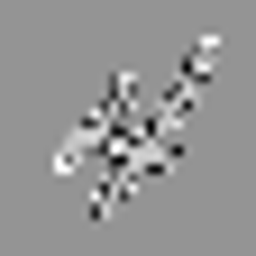

In [82]:
example(9)

3


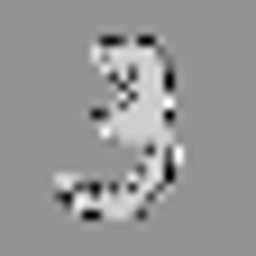

In [83]:
example(10)


In [84]:
train_loader.__iter__().__next__()[1]


tensor([4, 5, 9, 7, 0, 1, 4, 9, 7, 7, 7, 3, 0, 5, 3, 1, 9, 8, 7, 5, 6, 6, 8, 3,
        2, 6, 6, 5, 9, 0, 2, 8, 7, 6, 0, 9, 9, 9, 1, 2, 7, 7, 2, 0, 6, 9, 1, 4,
        6, 3, 7, 7, 2, 5, 1, 2, 3, 2, 8, 2, 8, 3, 8, 4])

In [85]:
train_loader.__iter__().__next__()[0].shape


torch.Size([64, 1, 28, 28])

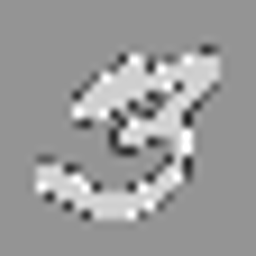

In [86]:
toPIL(train_loader.__iter__().__next__()[0][0]).resize((256,256))

Let's write a simple helper module.

In [0]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        batch_size = x.shape[0]
        return x.view(batch_size, -1)


In [0]:
model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
for param in model.parameters():
    init.uniform_(param, -0.1, 0.1)

Why do we need `Flatten` module?

Setup an optimizer:


In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Choose a loss function:

In [0]:
loss_function = loss.CrossEntropyLoss()


And start training:

In [0]:
def train(model, train_loader, optimizer, loss_function, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [0]:
def test(model, test_loader, loss_function):
    model.eval()
    test_loss = 0

    y_prediction = []
    
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_function(output, target).sum().item()
            pred = output.argmax(dim=1, keepdim=True)
            y_prediction.append(output)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    # print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #     test_loss, correct, len(test_loader.dataset),
    #     100. * correct / len(test_loader.dataset)))

    flat_list = [item for sublist in y_prediction for item in sublist]

    print(len(flat_list))
    return flat_list

In [93]:
 %%time

#  for epoch in range(1, 10):
#         train(model, train_loader, optimizer, loss_function, epoch)
#         test(model, test_loader, loss_function)

CPU times: user 15 µs, sys: 4 µs, total: 19 µs
Wall time: 23.4 µs


# Assignment

## Due to 10AM, 20.05.2020

## 1. MNIST playground [10]

In [0]:
# -------------------- 1. ----------------------------------- 
# For the test set; it has a constant percentage loss of 98% from the get go, 
#     Lying between Accuracy: 9821/10000 and Accuracy: 9819/10000
#     So i'll say the test accuracy is somewhat comstant

# -------------------- 2. ----------------------------------- 
# example(4321) #The 0 looks like a 6 to me
# example(600) #The nine looks like a 1 to me
# example(4542) #Is that a 2?
# example(56742) #This 9 is a joke

In [0]:
def ass_test(model, test_loader, loss_function):
    y_predictions = []

    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            
            output = model(data)
            
            test_loss += loss_function(output, target).sum().item()
            
            pred = output.argmax(dim=1, keepdim=True)
            
            y_predictions.append(pred)
            
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

    return [item for sublist in y_predictions for item in sublist]

In [98]:
#---------------------------------------------3 ----------------------------------------------
from sklearn.metrics import confusion_matrix

model = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(0, 105):
      train(model, train_loader, optimizer, loss_function, epoch)
      ass_test(model1, test_loader, loss_function)

labels = test_dataset.targets
y_pred = ass_test(model, test_loader, loss_function)

confusion_matrix(labels, y_pred)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.289697
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.225070
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.311553
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.179538
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.158620

Test set: Average loss: 0.0014, Accuracy: 9722/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.514318
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.148604
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.182951
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.158368
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.138909

Test set: Average loss: 0.0014, Accuracy: 9722/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.113120
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.121859
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.040371
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.146750
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.039738

Test set: Average loss: 0.0014, Accuracy: 9722/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.136310
Train Epoch: 3 [12800/60000 (21%)]	Lo

array([[ 96, 107,  97, 107, 102,  90,  94, 104,  88,  95],
       [118, 113, 123, 119, 122, 103, 103, 118,  99, 117],
       [105, 128, 104, 103, 100,  91, 107,  99, 100,  95],
       [ 96, 133,  96,  83,  91,  86, 101, 112, 108, 104],
       [ 76, 111, 102, 104, 106,  90,  93,  95, 108,  97],
       [ 94, 100,  98,  96,  85,  71,  82,  92,  79,  95],
       [ 98, 113, 100,  84, 100,  79,  95,  89,  87, 113],
       [ 98, 110, 107, 110,  99,  89, 105, 105,  99, 106],
       [109, 111,  93,  99,  94,  86,  83, 114,  96,  89],
       [ 94, 107, 115, 107,  81, 104,  97, 100, 110,  94]])

In [99]:
%%time
#  -----------------------------------------4 -----------------------------------------------
model1 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
optimizer1 = optim.SGD(model1.parameters(), lr=0.1)
for param in model1.parameters():
    init.uniform_(param, -0.1, 0.1)
for epoch in range(0, 105):
      train(model1, train_loader, optimizer1, loss_function, epoch)
      ass_test(model1, test_loader, loss_function)

# This takes about 2mins (probably bc i did just 5 iterations) and has test accuracy of 95%-97%

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.327614
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.322788
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.180111
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.170397
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.106102

Test set: Average loss: 0.0025, Accuracy: 9525/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.165890
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.222739
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.179312
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.132613
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.065397

Test set: Average loss: 0.0018, Accuracy: 9613/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.076624
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.103470
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.184033
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.074030
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.047837

Test set: Average loss: 0.0015, Accuracy: 9687/10000 (97%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.113985
Train Epoch: 3 [12800/60000 (21%)]	Lo

In [100]:
%%time
model2 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
optimizer2 = optim.SGD(model2.parameters(), lr=0.1)
for param in model2.parameters():
    init.uniform_(param, -1, 1)
for epoch in range(0, 105):
      train(model2, train_loader, optimizer2, loss_function, epoch)
      ass_test(model2, test_loader, loss_function)

#  --> Gives a test accuracy of 83% - 87%.
#  --> Takes approximately 2 minutes ; almost same time as the previous one

Train Epoch: 0 [0/60000 (0%)]	Loss: 7.337266
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.305615
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.800558
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.583531
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.582974

Test set: Average loss: 0.0083, Accuracy: 8365/10000 (84%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.384020
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.282239
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.574333
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.441757
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.259030

Test set: Average loss: 0.0067, Accuracy: 8667/10000 (87%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.211873
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.364755
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.449424
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.282921
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.189589

Test set: Average loss: 0.0059, Accuracy: 8844/10000 (88%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.259836
Train Epoch: 3 [12800/60000 (21%)]	Lo

In [101]:
%%time
model3 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
optimizer3 = optim.SGD(model3.parameters(), lr=0.1)
for param in model3.parameters():
    init.uniform_(param, 0)
for epoch in range(1, 105):
      train(model3, train_loader, optimizer3, loss_function, epoch)
      ass_test(model3, test_loader, loss_function)

#  --> Poorest model with a Test Accuracy of 11%
#  --> Takes the same amount of time as the previous 2

Train Epoch: 1 [0/60000 (0%)]	Loss: 3.368242
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.259674
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.340664
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.090500
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.203761

Test set: Average loss: 0.0357, Accuracy: 1962/10000 (20%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.318826
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.227855
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.134995
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.138198
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.255779

Test set: Average loss: 0.0351, Accuracy: 1441/10000 (14%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.218840
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.129416
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.217857
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.240223
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.277918

Test set: Average loss: 0.0351, Accuracy: 1809/10000 (18%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.124435
Train Epoch: 4 [12800/60000 (21%)]	Lo

In [102]:
%%time
#  ----------------------------------------------- 5 --------------------------------------------------
model4 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Sigmoid(),
                      nn.Linear(512, 64), 
                      nn.Sigmoid(),
                      nn.Linear(64, 10))
optimizer4 = optim.SGD(model4.parameters(), lr=0.1)
for epoch in range(1, 105):
      train(model4, train_loader, optimizer4, loss_function, epoch)
      ass_test(model4, test_loader, loss_function)

#  --> This runs for about 2 minutes and has a test accuracy in the range 88% - 94% 

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.359387
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.789837
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.919109
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.673962
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.468177

Test set: Average loss: 0.0067, Accuracy: 8793/10000 (88%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.484025
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.410158
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.236222
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.372621
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.247581

Test set: Average loss: 0.0047, Accuracy: 9145/10000 (91%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.292524
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.272689
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.181045
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.350339
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.336032

Test set: Average loss: 0.0039, Accuracy: 9283/10000 (93%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.482143
Train Epoch: 4 [12800/60000 (21%)]	Lo

In [103]:
%%time
# ------------------------------------------------ 6 -------------------------------------------------------------

model5 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 256), 
                      nn.Tanh(),
                      nn.Linear(256, 1024), 
                      nn.Tanh(),
                      nn.Linear(1024, 10))
optimizer5 = optim.SGD(model5.parameters(), lr=0.1)

print(len(model5.parameters()))

for epoch in range(0, 105):
      train(model5, train_loader, optimizer5, loss_function, epoch)
      ass_test(model5, test_loader, loss_function)

# --> This cell takes about 2minutes and has a range accuracy of 94% - 98%
# --> Here we have 6 parameters
# --> Because we are building 1024 ouputs from 256inputs, we should have more weights 
#       to enable those transformations from few inputs to so many

6
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.308177
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.165606
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.259422
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.170130
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.138069

Test set: Average loss: 0.0025, Accuracy: 9529/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.080634
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.158119
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.194048
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.109059
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.102879

Test set: Average loss: 0.0015, Accuracy: 9690/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.097351
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.018245
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.083821
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.129758
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.032937

Test set: Average loss: 0.0012, Accuracy: 9755/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.067308
Train Epoch: 3 [12800/60000 (21%)]	

In [104]:
%%time
# ------------------------------------------------ 7 -------------------------------------------------------------
model6 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 256), 
                      nn.Tanh(),
                      nn.Linear(256, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
optimizer6 = optim.SGD(model6.parameters(), lr=0.1)
for epoch in range(0, 105):
      train(model6, train_loader, optimizer6, loss_function, epoch)
      # ass_test(model6, test_loader, loss_function)

print(len(list(model6.parameters())))

# --> Test accuracy lies bwtween 95% and 97%. 
# --> Because there is a layer more than the previous cells, it should take more time to complete and have more parameters
# --> This cell has 8 parameters

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.307003
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.226137
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.141190
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.230117
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.152591
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.086357
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.075259
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.139744
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.145347
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.100430
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.143588
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.099064
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.187879
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.121555
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.081323
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.074681
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.008886
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.012741
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.060795
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.011299
Train Epoch: 4 [0/60

In [105]:
%%time
model7 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 5), 
                      nn.Tanh(),
                      nn.Linear(5, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
optimizer7 = optim.SGD(model7.parameters(), lr=0.1)
for epoch in range(0, 105):
      train(model7, train_loader, optimizer7, loss_function, epoch)
      ass_test(model7, test_loader, loss_function)

print(len(list(model7.parameters())))

# --> It takes a few seconds more to complete compared to the q4 and q5 because of the extra layer
# --> It should have 8 layers like in the other cell
# --> The accuracy should pumelt because we are extracting 64 features from 5 
#     features after loosing over half of our features from 512

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.303751
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.688768
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.238333
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.290020
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.254590

Test set: Average loss: 0.0060, Accuracy: 8944/10000 (89%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.373551
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.165000
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.309689
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.179566
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.116013

Test set: Average loss: 0.0032, Accuracy: 9477/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.122568
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.127964
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.194820
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.047592
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.162460

Test set: Average loss: 0.0034, Accuracy: 9423/10000 (94%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.070868
Train Epoch: 3 [12800/60000 (21%)]	Lo

In [106]:
%%time
# ------------------------------------------- 8 -----------------------------------------------------
model8 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 5),
                      nn.Dropout(0.35, inplace=True),
                      nn.Linear(5, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))
print(len(list(model8.parameters())))

optimizer8 = optim.SGD(model8.parameters(), lr=0.1)
for epoch in range(0, 5):
      train(model8, train_loader, optimizer8, loss_function, epoch)
      ass_test(model8, test_loader, loss_function)

# --> Training using dropout ensures that some features aren't considered more important than others by randomly deselecting 
#     some nodes during the training process. I think a model which uses dropuout is barely biased on the training.

8
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.306140
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.974462
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.781608
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.683485
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.620702

Test set: Average loss: 0.0039, Accuracy: 9302/10000 (93%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.622591
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.410312
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.567970
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.489436
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.552429

Test set: Average loss: 0.0031, Accuracy: 9426/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.530663
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.337218
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.296914
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.627043
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.326032

Test set: Average loss: 0.0030, Accuracy: 9479/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.343894
Train Epoch: 3 [12800/60000 (21%)]	

In [107]:
%%time
# ----------------------------------------------- 9 ---------------------------------------------------------------------

ass_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=False)

model9 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 5),
                      nn.ReLU(),
                      nn.Linear(5, 64), 
                      nn.Tanh(),
                      nn.Linear(64, 10))

optimizer9 = optim.SGD(model9.parameters(), lr=0.1)

for param in model9.parameters():
    init.uniform_(param, -0.1, 0.1)
    
print(len(list(model9.parameters())))

for epoch in range(0, 5):
      train(model9, ass_train_loader, optimizer9, loss_function, epoch)
      ass_test(model9, test_loader, loss_function)

# --> When training, the loss reduces faster than in the shuffled model because the data is probably correlated

8
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.311835
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.377528
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.403388
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.170413
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.190133

Test set: Average loss: 0.0034, Accuracy: 9354/10000 (94%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.199399
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.104464
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.161599
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.149482
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.117231

Test set: Average loss: 0.0025, Accuracy: 9515/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.048746
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.065783
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.056629
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.131726
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.077530

Test set: Average loss: 0.0023, Accuracy: 9544/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.016801
Train Epoch: 3 [12800/60000 (21%)]	

In [108]:
%%time
# ---------------------------------------------- 10 ----------------------------------------------------
#  50

b_size = len(train_dataset)//2
ass_2_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=b_size, shuffle=False)

model10 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 5),
                      nn.ReLU(),
                      nn.Linear(5, 10))

optimizer10 = optim.SGD(model10.parameters(), lr=0.1)

for param in model10.parameters():
    init.uniform_(param, -0.1, 0.1)

print(len(list(model10.parameters())))

for epoch in range(0, 5):
      train(model10, ass_2_train_loader, optimizer10, loss_function, epoch)
      ass_test(model10, test_loader, loss_function)

# --> The test accuracy is barely significant
# --> The model doesn't have enough data to train on hence the test accuracy
# --> This model barely learns anything

6
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.287766

Test set: Average loss: 0.0356, Accuracy: 1631/10000 (16%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.271450

Test set: Average loss: 0.0353, Accuracy: 1998/10000 (20%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.251193

Test set: Average loss: 0.0348, Accuracy: 2322/10000 (23%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.224027

Test set: Average loss: 0.0343, Accuracy: 2665/10000 (27%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.188049

Test set: Average loss: 0.0335, Accuracy: 3070/10000 (31%)

CPU times: user 1min 16s, sys: 444 ms, total: 1min 17s
Wall time: 1min 17s


In [109]:
%%time
# 30%

b_size = int(round((3 * len(train_dataset))//10))

ass_3_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=b_size, shuffle=False)

model11 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 5),
                      nn.ReLU(),
                      nn.Linear(5, 64))

optimizer11 = optim.SGD(model11.parameters(), lr=0.1)

for param in model11.parameters():
    init.uniform_(param, -0.1, 0.1)

print(len(list(model11.parameters())))

for epoch in range(0, 5):
      train(model11, ass_3_train_loader, optimizer11, loss_function, epoch)
      ass_test(model11, test_loader, loss_function)

# --> The test accuracy is barely significant
# --> The model doesn't have enough data to train on hence the test accuracy
# --> This model barely learns anything

6
Train Epoch: 0 [0/60000 (0%)]	Loss: 4.173932

Test set: Average loss: 0.0645, Accuracy: 867/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 4.109099

Test set: Average loss: 0.0635, Accuracy: 1649/10000 (16%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 4.041963

Test set: Average loss: 0.0597, Accuracy: 2007/10000 (20%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 3.803080

Test set: Average loss: 0.0446, Accuracy: 1804/10000 (18%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.850003

Test set: Average loss: 0.0329, Accuracy: 3408/10000 (34%)

CPU times: user 1min 15s, sys: 165 ms, total: 1min 15s
Wall time: 1min 15s


In [110]:
%%time
# 10%

b_size = int(round((1 * len(train_dataset))//10))

ass_4_train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=b_size, shuffle=False)

model12 = nn.Sequential(Flatten(), 
                      nn.Linear(784, 512), 
                      nn.Tanh(),
                      nn.Linear(512, 5),
                      nn.ReLU(),
                      nn.Linear(5, 64))

optimizer12 = optim.SGD(model12.parameters(), lr=0.1)

for param in model12.parameters():
    init.uniform_(param, -0.1, 0.1)

print(len(list(model12.parameters())))

for epoch in range(0, 5):
      train(model12, ass_4_train_loader, optimizer12, loss_function, epoch)
      ass_test(model12, test_loader, loss_function)

# --> The test accuracy is barely significant
# --> The model doesn't have enough data to train on hence the test accuracy
# --> This model is a joke 

6
Train Epoch: 0 [0/60000 (0%)]	Loss: 4.212206

Test set: Average loss: 0.0625, Accuracy: 1000/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 3.981749

Test set: Average loss: 0.0380, Accuracy: 2544/10000 (25%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.425915

Test set: Average loss: 0.0304, Accuracy: 3944/10000 (39%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.936317

Test set: Average loss: 0.0255, Accuracy: 4898/10000 (49%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.622102

Test set: Average loss: 0.0214, Accuracy: 4995/10000 (50%)

CPU times: user 1min 14s, sys: 90.6 ms, total: 1min 14s
Wall time: 1min 15s


**Important!** This task is not too hard, but it is pretty time-consuming. Total computation time is about 4 hours.

1. Find out how many epochs are needed for our network to stop improving on test dataset (let's stop on 5 epochs without accuracy improvement on the test set). How long does it take? [1]
2. Find some problematic examples and show them with `example()` function we defined in class.[1]
3. Draw a confusion matrix for your model on test dataset. It is a 10x10 matrix, and in the cell `(i,j)` there is a number of digits `i` classified as digit `j`.[1]
4. By default weight of linear layer is initialized with `kaiming_uniform` function and bias is unitialized with `uniform` function (see reset parameters method of Linear class https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py). Initialize all weights as `uniform(-0.1,0.1)` and test. How does this modification affect training process? Is it faster/slower? Is the end result better/worse? Same question form `uniform(-1, 1)`. Same question for `constant(0)` initialization. Don't forget to recreate optimizer for your new model (otherwise you'll optimize parameters of the old model using values from the new one, which does not work).[1]
5. Try replacing `Tanh` activation by `Sigmoid` test, how does this modification affect training process? These and further questions assumes that you are changing the initial model (i.e. all modification from previous step are undone). [1]
6. Try changing output dimension of the first linear layer  (and input of the second) to `256`, to `1024`. How does this modification affect training process? How does the number of model parameters changes? [1]
7. Our model has 2 hidden layers of sizes `512` and `64`. Let's use 3 hidden layers of sizes `512`, `256` and `64`.  How does this modification affect training process? How does the number of model parameters changes? Same question for 3 layers of sizes `512`, `5` and `64`(don't forget to add activation function between linear layers). [1]
8. Try adding dropout after first/second layer. How does this modification affect training process? [1]
9. Try disabling shuffle in the train dataloader (leave it unchanged in the test dataloader, otherwise testing will not be fair). How does this modification affect training process? Do not forget to reset training weights of the model. [1]
10. Try training, using half of the training dataset. 30%. 10%. How does this affect training process? Do not forget to reset training weights of the model. [1] 

